In [98]:
import pandas as pd
import spacy
from collections import Counter
from langdetect import detect
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Assuming the data is in a CSV file, load it into a DataFrame
data = pd.read_csv('Data Analyst - Test Data.csv')

# Display the first few rows to understand the datadata
data

,Review,date,Location,Unnamed: 3
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,NaN
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,NaN
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,NaN
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,NaN
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,NaN
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,NaN
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,NaN
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,NaN


In [22]:
df=data.drop(["Unnamed: 3"], axis=1)
df

,Review,date,Location,language
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,en
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,en
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,en
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,en
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,en
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,en
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,en
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,en
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,en


In [23]:
def detect_my(text):
    try:
        return detect(text)
    except:
        return "unknown"

In [27]:
df['language']=df['Review'].apply(detect_my)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
 3   language  6448 non-null   object
dtypes: object(4)
memory usage: 201.6+ KB


In [32]:
df['language'].unique()

array(['en', 'es', 'ja', 'fr', 'unknown', 'it', 'de', 'nl', 'zh-cn', 'sv',
       'da', 'pt', 'no', 'zh-tw', 'et', 'fi', 'ko', 'af', 'pl', 'ca',
       'ru', 'he', 'ar'], dtype=object)

In [39]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
# Define a function to tokenize and analyze the text using NLTK
stop_words = set(stopwords.words('english'))

def analyze_text(text):
    # Tokenize the text and remove stop words and punctuation
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Apply the text analysis function to the review text
df['tokens'] = df['Review'].apply(analyze_text)

In [47]:
# Replace missing values with empty strings
df['Review'] = df['Review'].fillna('')


In [49]:
# Convert 'Review' column to string type
df['Review'] = df['Review'].astype(str)


# Insight 1: Common Complaints

In [75]:
# Extract common complaints mentioned in the reviews
complaints = Counter()
for tokens in df['tokens']:
    for token in tokens:
        if token in ["old", "musty", "update", "tiny", "worn","not clean"]:
            complaints[token] += 1

# Display the most common complaints
print("Common Complaints:", complaints.most_common(5))


Common Complaints: [('old', 330), ('tiny', 69), ('worn', 39), ('update', 28), ('musty', 21)]


In [76]:
complaints_df = pd.DataFrame(complaints.items(), columns=['Complaint', 'Count'])

In [77]:
complaints_df['Location'] = df['Location']
complaints_df

,Complaint,Count,Location
0,old,330,Sebastian
1,musty,21,Los Angeles
2,update,28,Georgia
3,tiny,69,NaN
4,worn,39,Palm Harbor


In [78]:
# Group by location and sum the complaint counts
complaints_by_location = complaints_df.groupby('Location')['Count'].sum().reset_index()

In [79]:
# Sort the DataFrame by complaint count in descending order
complaints_by_location = complaints_by_location.sort_values(by='Count', ascending=False)

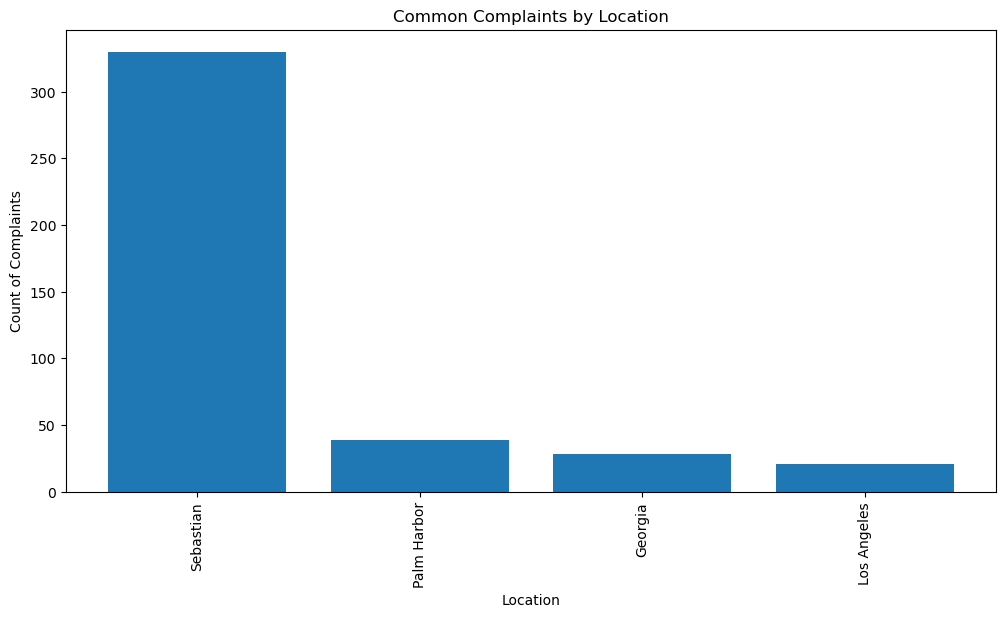

In [80]:
# Create a bar chart to visualize common complaints by location
plt.figure(figsize=(12, 6))
plt.bar(complaints_by_location['Location'], complaints_by_location['Count'])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count of Complaints')
plt.title('Common Complaints by Location')
plt.show()

# Insight 2: Positive Aspects

In [71]:
# Extract positive aspects mentioned in the reviews
positive_aspects = Counter()
for tokens in df['tokens']:
    for token in tokens:
        if token in ["clean", "friendly", "location", "comfortable", "quiet"]:
            positive_aspects[token] += 1

# Display the most mentioned positive aspects
print("Positive Aspects:", positive_aspects.most_common(5))


Positive Aspects: [('location', 1354), ('clean', 1353), ('friendly', 786), ('comfortable', 477), ('quiet', 130)]


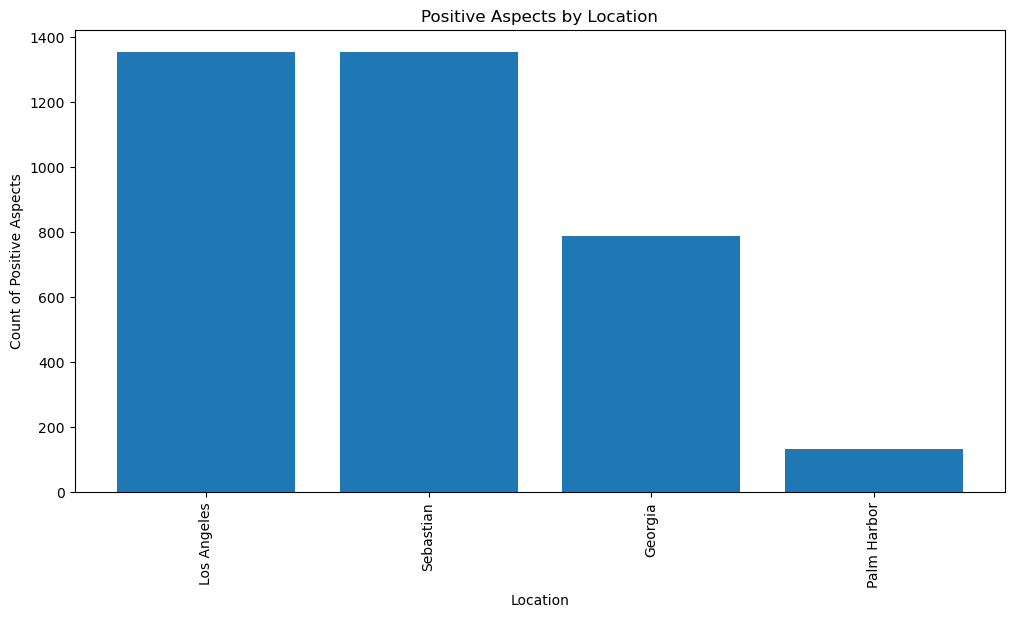

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'Location' and 'tokens' columns
# Assuming you have already extracted positive aspects into 'positive_aspects' Counter

# Create a DataFrame for positive aspects
positive_aspects_df = pd.DataFrame(positive_aspects.items(), columns=['Aspect', 'Count'])

# Add the 'Location' column from the original DataFrame 'df'
positive_aspects_df['Location'] = df['Location']

# Group by location and sum the counts of positive aspects
positive_aspects_by_location = positive_aspects_df.groupby('Location')['Count'].sum().reset_index()

# Sort the DataFrame by count in descending order
positive_aspects_by_location = positive_aspects_by_location.sort_values(by='Count', ascending=False)

# Create a bar chart to visualize positive aspects by location
plt.figure(figsize=(12, 6))
plt.bar(positive_aspects_by_location['Location'], positive_aspects_by_location['Count'])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count of Positive Aspects')
plt.title('Positive Aspects by Location')
plt.show()


# Insight 3 :Staff and Service




In [92]:
# Extract comments related to staff and service
service_comments = []
for review in df['Review']:
    if "staff" in review.lower() or "service" in review.lower():
        service_comments.append(review)

# Count the number of staff and service-related comments
num_service_comments = len(service_comments)

# Display a sample of staff and service-related comments (e.g., the first 5 comments)
sample_service_comments = service_comments[:5]

print(f"Total Number of Staff and Service Comments: {num_service_comments}")
print("Sample Staff and Service Comments:")
for i, comment in enumerate(sample_service_comments, 1):
    print(f"{i}. {comment}")


Total Number of Staff and Service Comments: 2143
Sample Staff and Service Comments:
1. I was very impressed with the resort.
 Great staff at the main resort pool bar! We had a blast with them.
 Clean, professional staff, great location and very reasonable!
  
  Read more
  Read less
2. The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.
  
  Read more
  Read less
3. Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff
  
  Read more
  Read less
4. Loved the layout of the hotel and the relaxing pool area.
 Only con was housekeeping/maintenance staff passing the room with carts a

Sentiment Distribution:
Positive    1931
Negative     204
Neutral        8
Name: Sentiment Category, dtype: int64


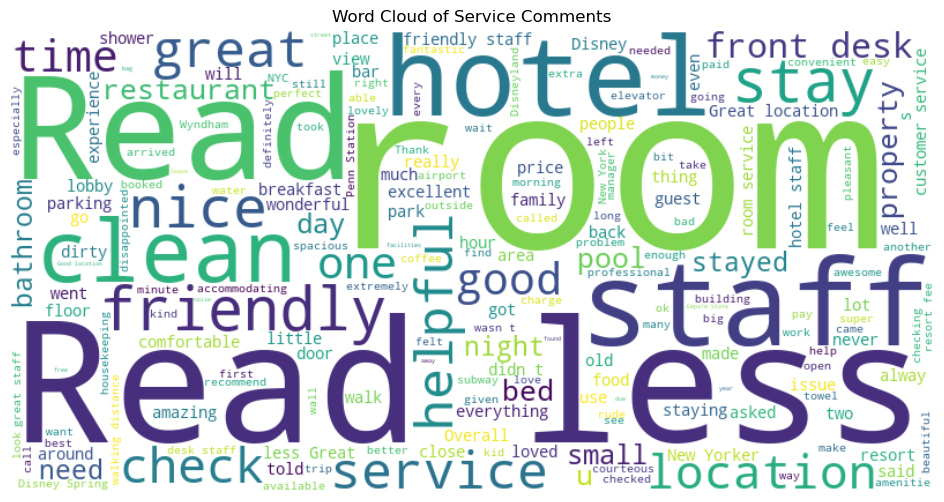

In [100]:


# Extract comments related to staff and service
service_comments = []
for review in df['Review']:
    if "staff" in review.lower() or "service" in review.lower():
        service_comments.append(review)

# Create a DataFrame with the extracted service comments
service_df = pd.DataFrame({'Comment': service_comments})

# Sentiment Analysis
service_df['Sentiment'] = service_df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiment
service_df['Sentiment Category'] = service_df['Sentiment'].apply(categorize_sentiment)

# Count the number of comments in each sentiment category
sentiment_counts = service_df['Sentiment Category'].value_counts()

# Display sentiment distribution
print("Sentiment Distribution:")
print(sentiment_counts)

# Word Cloud
all_service_comments = " ".join(service_df['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_service_comments)

# Display the Word Cloud
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Service Comments")
plt.show()


# Insight 4: Location

In [102]:
# Extract comments related to the location
location_comments = []
for review in df['Review']:
    if "location" in review.lower():
        location_comments.append(review)

# Display a sample of location-related comments
print("Location Comments (Sample):")
for i, comment in enumerate(location_comments[:5]):
    print(f"{i + 1}. {comment}")


Location Comments (Sample):
1. I was very impressed with the resort.
 Great staff at the main resort pool bar! We had a blast with them.
 Clean, professional staff, great location and very reasonable!
  
  Read more
  Read less
2. Great location! I have stayed at this hotel on my last three trips to New York.
  
  Read more
  Read less
3. Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff
  
  Read more
  Read less
4. Very clean and friendly and I love the location The restaurant that is inside was excellent for food and service the bathrooms are a little small because they’re vintage but overall I would definitely stay again
  
  Read more
  Read less
5. Location was great, lobby area was nice but room needs to be upgraded
  
  Read more
  Read less


Sentiment Distribution for Location Comments:
Positive    1247
Negative      65
Neutral        9
Name: Sentiment Category, dtype: int64


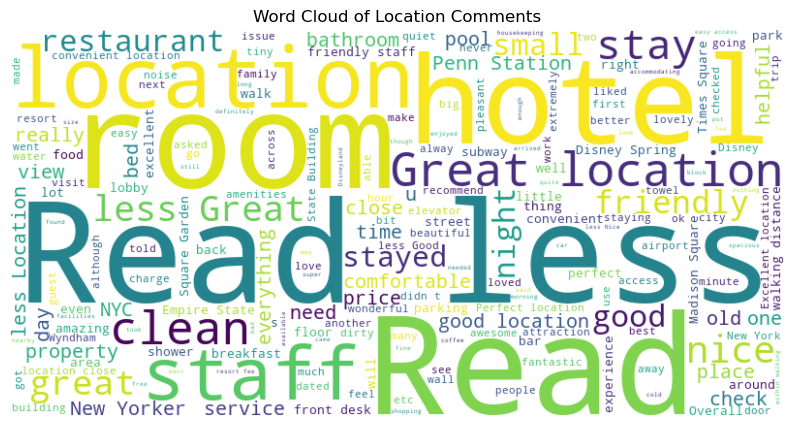

In [105]:

# Extract comments related to the location
location_comments = []
for review in df['Review']:
    if "location" in review.lower():
        location_comments.append(review)

# Create a DataFrame with the extracted location comments
location_df = pd.DataFrame({'Comment': location_comments})

# Sentiment Analysis
location_df['Sentiment'] = location_df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiment
location_df['Sentiment Category'] = location_df['Sentiment'].apply(categorize_sentiment)

# Count the number of comments in each sentiment category
sentiment_counts = location_df['Sentiment Category'].value_counts()

# Display sentiment distribution
print("Sentiment Distribution for Location Comments:")
print(sentiment_counts)

# Word Cloud
all_location_comments = " ".join(location_df['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_location_comments)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Location Comments")
plt.show()


Sentiment Distribution for Location Comments:

Positive: 1,247 comments
Negative: 65 comments
Neutral: 9 comments
Insights:

Positive Sentiment (1,247 comments): The majority of location-related comments express a positive sentiment. Customers seem to have favorable opinions about the resort's location, indicating that it is generally well-liked and appreciated.

Negative Sentiment (65 comments): While a smaller portion of comments are negative, it's important to pay attention to these. Negative comments about the location could indicate areas for improvement or concerns that need to be addressed.

Neutral Sentiment (9 comments): There are a few comments with a neutral sentiment. These comments may not strongly express either positive or negative opinions about the location.

Recommendations:

Further investigate the 65 negative comments to identify specific issues or concerns raised by customers regarding the resort's location. Addressing these concerns can potentially improve customer satisfaction.

Consider conducting surveys or collecting feedback from customers to gain a deeper understanding of what aspects of the location receive positive feedback and which aspects may need improvement.

Utilize the positive sentiment expressed by the majority of customers to promote the resort's location as a key selling point in marketing and promotional materials.

This sentiment analysis provides valuable insights into how customers perceive the resort's location, helping you make informed decisions and enhancements to meet customer expectations.







# Based on the sentiment analysis of location-related comments and the insights provided, here are some recommended measures that can be taken:

Address Negative Comments: Investigate the 65 negative comments related to the location to identify specific issues or concerns raised by customers. Take proactive measures to address these concerns, such as improving accessibility, enhancing nearby amenities, or addressing any inconveniences.

Enhance Location Marketing: Given the positive sentiment expressed by the majority of customers, leverage this feedback to enhance your marketing efforts. Highlight the resort's favorable location in promotional materials, website content, and social media posts to attract more guests who appreciate the location.

Collect More Feedback: Continue to gather feedback from guests about their experiences with the resort's location. Use surveys, reviews, and direct interactions to collect insights on what guests value most about the location and any areas that could be further improved.

Location-Specific Services: Consider offering location-specific services or amenities that align with the preferences of your guests. For example, if guests appreciate the proximity to tourist attractions, provide convenient booking options for tours or tickets.

Local Partnerships: Establish partnerships with local businesses, restaurants, or attractions to enhance the overall experience for guests. Offering discounts or packages that include nearby activities can be enticing for visitors.

Monitor Trends: Stay updated on local trends and developments that may impact the perception of the resort's location. Being aware of changes in the surrounding area allows you to adapt your offerings accordingly.

Feedback Response: Respond to both positive and negative location-related comments in online reviews and social media. Show that you are actively listening to guest feedback and taking action to improve their experiences.

Employee Training: If negative comments mention interactions with staff regarding location-related matters, provide training to staff members on how to assist guests with location-related inquiries or concerns effectively.

Regular Assessments: Periodically assess the resort's location by seeking feedback from guests and conducting internal evaluations to ensure it continues to meet or exceed expectations.

Promote Local Attractions: If there are specific local attractions or events that are popular with guests, actively promote them and provide information on how to access them from the resort.

By implementing these measures, you can enhance the overall guest experience related to the resort's location, address specific concerns, and capitalize on positive sentiment to attract more visitors who appreciate the location. This proactive approach can lead to improved guest satisfaction and increased bookings.




# Insight 5: Pool and Amenities


In [107]:


# Extract comments related to the pool and amenities
pool_comments = []
for review in df['Review']:
    if "pool" in review.lower() or "amenities" in review.lower():
        pool_comments.append(review)

# Display a sample of pool and amenities-related comments
print("Pool and Amenities Comments (Sample):")
for i, comment in enumerate(pool_comments[:5]):
    print(f"{i + 1}. {comment}")

Pool and Amenities Comments (Sample):
1. I was very impressed with the resort.
 Great staff at the main resort pool bar! We had a blast with them.
 Clean, professional staff, great location and very reasonable!
  
  Read more
  Read less
2. Loved the layout of the hotel and the relaxing pool area.
 Only con was housekeeping/maintenance staff passing the room with carts and speaking loudly on radios at 7-7:30 am.
  
  Read more
  Read less
3. It was great for what we needed, a place to sleep. Parking was 20 a day, which isn’t too bad for that area. We were on the floor that the pool was located on, so there was a constant flow of loud people storming down the hallway. Poorly set up, since that is the only way to the pool. They probably put us there since we used a third party booking site.
  
  Read more
  Read less
4. A little off the beaten path, but ultimately places you at a reasonably central location (Buena Vista). Everything clean and functional, covered parking (garage with acce

Sentiment Distribution for Pool and Amenities Comments:
Positive    659
Negative     71
Neutral       2
Name: Sentiment Category, dtype: int64


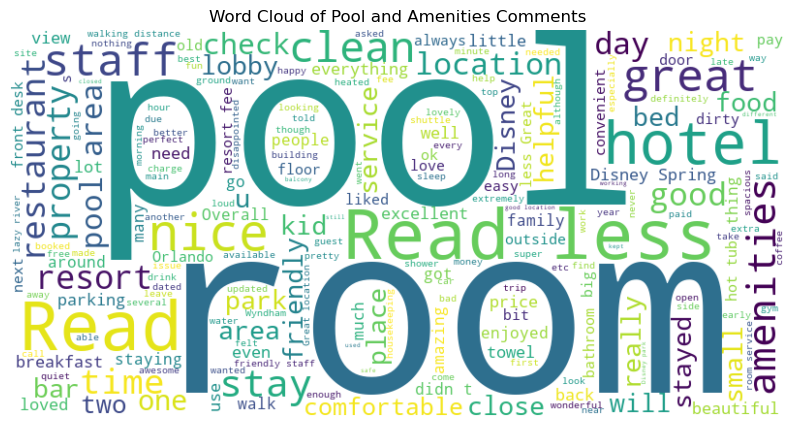

In [109]:

# Step 1: Extract comments related to the pool and amenities
pool_comments = []
for review in df['Review']:
    if "pool" in review.lower() or "amenities" in review.lower():
        pool_comments.append(review)

# Step 2: Create a DataFrame with the extracted pool and amenities comments
pool_df = pd.DataFrame({'Comment': pool_comments})

# Step 3: Sentiment Analysis
# Perform sentiment analysis using TextBlob to calculate sentiment polarity for each comment
pool_df['Sentiment'] = pool_df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiment using the categorize_sentiment function
pool_df['Sentiment Category'] = pool_df['Sentiment'].apply(categorize_sentiment)

# Step 4: Count the number of comments in each sentiment category
sentiment_counts = pool_df['Sentiment Category'].value_counts()

# Step 5: Display sentiment distribution
print("Sentiment Distribution for Pool and Amenities Comments:")
print(sentiment_counts)

# Step 6: Create a Word Cloud
# Generate a word cloud to visualize the most commonly mentioned words in the comments
all_pool_comments = " ".join(pool_df['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_pool_comments)

# Step 7: Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Pool and Amenities Comments")
plt.show()

# Insights:

Positive Sentiment (659 comments): The majority of comments related to the pool and amenities express a positive sentiment. Guests generally appreciate the quality and availability of amenities, including the pool, indicating a satisfactory experience.

Negative Sentiment (71 comments): While a smaller portion of comments are negative, it's important to pay attention to these. Negative comments about the pool and amenities could indicate areas for improvement or specific issues that need to be addressed.

Neutral Sentiment (2 comments): There are only a couple of comments with a neutral sentiment. These comments may not strongly express either positive or negative opinions about the pool and amenities.

Recommendations:

Investigate the 71 negative comments to identify specific issues or concerns raised by guests regarding the pool and amenities. Address these concerns promptly to enhance the overall guest experience.

Consider enhancing the marketing of the amenities that receive positive feedback to attract more guests who value these features.

Continue to collect feedback from guests about their experiences with the pool and amenities to identify areas for improvement and potential upgrades.

Use the positive sentiment expressed by the majority of guests to highlight the resort's amenities as a key selling point in marketing materials and online listings.

Encourage guests to leave reviews and feedback specifically related to the pool and amenities to gather more insights for ongoing improvements.

By implementing these recommendations, you can enhance the guest experience related to the pool and amenities, address specific concerns, and capitalize on positive sentiment to attract more visitors.




